<a href="https://colab.research.google.com/github/azayverma/playground/blob/main/rock_class_xgboos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
data = pd.read_csv('training_data.csv')  
data.head(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


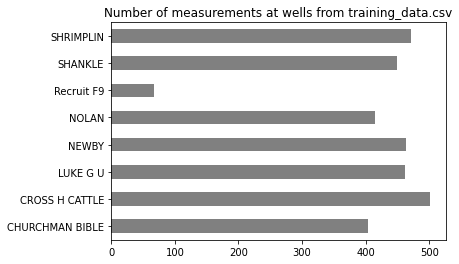

In [ ]:
well_labels = ['CHURCHMAN BIBLE', 'CROSS H CATTLE', 'LUKE G U', 'NEWBY', 'NOLAN',
                 'Recruit F9', 'SHANKLE','SHRIMPLIN']

measure_count = data['Well Name'].value_counts().sort_index()
measure_count.index = well_labels

fig=plt.figure()
measure_count.plot(kind='barh',color='gray', 
                   title='Number of measurements at wells from training_data.csv')

It looks like except for well 'Recruit F9', the other wells have roughly the same numebr of measurements.

['SHRIMPLIN' 'SHRIMPLIN' 'SHRIMPLIN' ... 'CHURCHMAN BIBLE'
 'CHURCHMAN BIBLE' 'CHURCHMAN BIBLE']


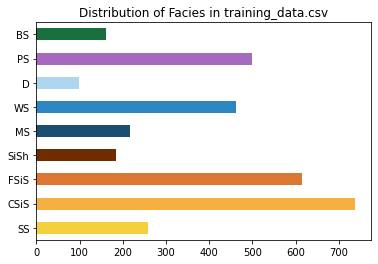

In [ ]:
# 1=sandstone  2=c_siltstone   3=f_siltstone ​from confusion_matrix_utilities import plot_confusion_matrix
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

fig=plt.figure()

print(data['Well Name'].values)

facies_count = data['Facies'].value_counts().sort_index()
facies_count.index = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

facies_count.plot(kind='barh',color=facies_colors, 
                   title='Distribution of Facies in training_data.csv')

Two attributes in the well log measurements caught our attention: Resistivity (R) and Neutron Density Porosity (P). Resistivity measures the ability of subsurface materials to resist or inhibit electrical conduction, while Neutron Density Porosity (P) measures subsurface materials’ porosity.

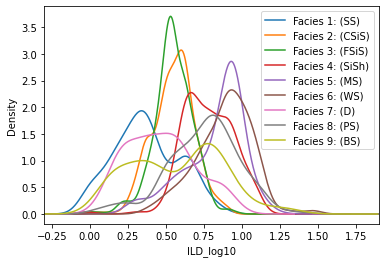

In [ ]:
# define dictionary
dict={1: 'SS', 2: 'CSiS', 3: 'FSiS', 
      4: 'SiSh', 5: 'MS', 6: 'WS', 
      7: 'D', 8: 'PS', 9: 'BS'}

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('ILD_log10')
ax.set_xlim([-0.30, 1.9])
for i in range(1,10):
    x = data[data['Facies'] == i]['ILD_log10']
    label = "Facies " + str(i) + ": ("+ dict[i] + ")"
    x.plot(kind='density', label=label )
ax.legend(loc='best')

<ipython-input-5-8610d56a0de3>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  x = pd.np.log10(data[data['Facies'] == i]['PHIND'])
<ipython-input-5-8610d56a0de3>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  x = pd.np.log10(data[data['Facies'] == i]['PHIND'])
<ipython-input-5-8610d56a0de3>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  x = pd.np.log10(data[data['Facies'] == i]['PHIND'])
<ipython-input-5-8610d56a0de3>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  x = pd.np.log10(data[data['Facies'] == i]['PHIND'])
<ipython-input-5-8610d56a0de3>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas 

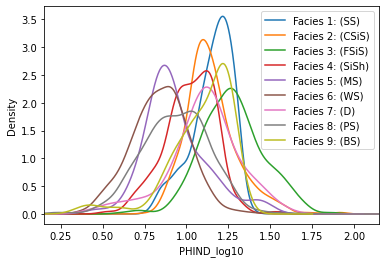

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PHIND_log10')
ax.set_xlim([0.15, 2.15])
for i in range(1,10):
    x = pd.np.log10(data[data['Facies'] == i]['PHIND'])
    label = "Facies " + str(i) + ": ("+ dict[i] + ")"
    x.plot(kind='density', label=label )
ax.legend(loc='best')

Intuitively, higher porosity means more pore space, indicating less resistivity in general. So to first order, those two quantities (R and P) should be negatively correlated. Is there any literature which has already studied the relationship between R and P in detail? Maybe we can gain some insight starting from there?

We quickly found one empirical equation named after Gus Archie (1972). Archie summarized his observations and indicated the logarithmic forms log(R) and log(P) would be linearly anti-correlated under some assumptions. 

$log_{10} R = log_{10} C - m\cdot log_{10} P$

where $R$ is formation resistivity, $P$ is neutron density porosity, $C$ is tortuousity constant, and $m$ is cementation factor, which depends on rock formation.

To verify if Archie’s equation is applicable in this well log problem, we randomly picked 3 facies (1,3,7 in this case) and plotted the log(R) vs. log(P), overlaying with linear fitting curve. It turns out, at least for some classes (i.e. Facies 1 & 3 in this plot), the separation power is quite strong.

<ipython-input-6-e7fe925a7abe>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  x = pd.np.log10(data[data['Facies'] == i]['PHIND'])
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-6-e7fe925a7abe>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  x = pd.np.log10(data[data['Facies'] == i]['PHIND'])
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

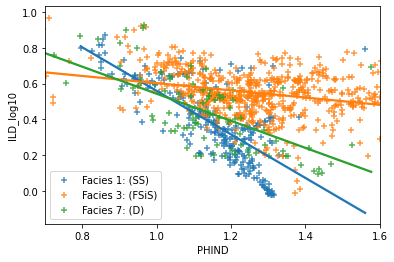

In [ ]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim([0.7, 1.6])
ax.set_xlabel('PHIND_log10')

for i in (1, 3, 7):
    x = pd.np.log10(data[data['Facies'] == i]['PHIND'])
    y = data[data['Facies'] == i]['ILD_log10']
    label = "Facies " + str(i) + ": ("+ dict[i] + ")"
    sns.regplot(x, y, marker='+', label=label, ci=1)
ax.legend(loc='best')

##  Construct new feature based on Archie's equation

Based on the observation, we construct a new feature based on Archie's equation by taking the logrithmic ratio of Porosity and Density.

In [ ]:
data['ILDoLogPhi'] = data['ILD_log10'] / pd.np.log10(data['PHIND'])
data.head(10)

<ipython-input-7-04ffce223590>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  data['ILDoLogPhi'] = data['ILD_log10'] / pd.np.log10(data['PHIND'])


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,ILDoLogPhi
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,0.617046
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,0.601367
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,0.589812
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,0.585989
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,0.575699
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894,0.564521
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872,0.550723
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830,0.546501
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809,0.544737
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787,0.533438


Same as TLE tutorial, we will save well "SHANKLE" as test well

In [ ]:
data_test = data[data['Well Name'] == 'SHANKLE']   # test data
data = data[data['Well Name'] != 'SHANKLE']        # training data

In [ ]:
print(data_test.shape, data.shape)

(449, 12) (2783, 12)


In [ ]:
features1 = ['GR', 'ILD_log10', 'DeltaPHI','PHIND','PE','NM_M', 'RELPOS']                 # features used in benchmark approach
features2 = ['GR', 'ILD_log10', 'DeltaPHI','PHIND','PE','NM_M', 'RELPOS','ILDoLogPhi']    # features used in our approach

# benchmark
feature_vectors1 = data[features1]
facies_labels1 = data['Facies']
feature_vectors1_test = data_test[features1]
facies_labels1_test = data_test['Facies']

# our approach
feature_vectors2 = data[features2]
facies_labels2 = data['Facies']
feature_vectors2_test = data_test[features2]
facies_labels2_test = data_test['Facies']

# Store well labels and depths
well = data['Well Name'].values
depth = data['Depth'].values
well_test = data_test['Well Name'].values
depth_test = data_test['Depth'].values

# Fill 'PE' missing values with mean
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
imp.fit(feature_vectors1)
print("Before transform: feature_vectors1.shape = ", feature_vectors1.shape)
feature_vectors1 = imp.transform(feature_vectors1)
print("After transform: feature_vectors.shape = ", feature_vectors1.shape)
imp.fit(feature_vectors1_test)
feature_vectors1_test = imp.transform(feature_vectors1_test)

imp.fit(feature_vectors2)
print("Before transform: feature_vectors1.shape = ", feature_vectors2.shape)
feature_vectors2 = imp.transform(feature_vectors2)
print("After transform: feature_vectors.shape = ", feature_vectors2.shape)
imp.fit(feature_vectors2_test)
feature_vectors2_test = imp.transform(feature_vectors2_test)

Before transform: feature_vectors1.shape =  (2783, 7)
After transform: feature_vectors.shape =  (2783, 7)
Before transform: feature_vectors1.shape =  (2783, 8)
After transform: feature_vectors.shape =  (2783, 8)


In [ ]:

def augment_features_window(X, N_neig):
    
    # Parameters
    N_row = X.shape[0]
    N_feat = X.shape[1]

    # Zero padding
    X = np.vstack((np.zeros((N_neig, N_feat)), X, (np.zeros((N_neig, N_feat)))))

    # Loop over windows
    X_aug = np.zeros((N_row, N_feat*(2*N_neig+1)))
    for r in np.arange(N_row)+N_neig:
        this_row = []
        for c in np.arange(-N_neig,N_neig+1):
            this_row = np.hstack((this_row, X[r+c]))
        X_aug[r-N_neig] = this_row

    return X_aug


# Feature gradient computation function
def augment_features_gradient(X, depth):
    
    # Compute features gradient
    d_diff = np.diff(depth).reshape((-1, 1))
    d_diff[d_diff==0] = 0.001
    X_diff = np.diff(X, axis=0)
    X_grad = X_diff / d_diff
        
    # Compensate for last missing value
    X_grad = np.concatenate((X_grad, np.zeros((1, X_grad.shape[1]))))
    
    return X_grad

# Feature augmentation function
def augment_features(X, well, depth, N_neig=1):
#def augment_features(X, well, depth, N_neig=0):   

    # Augment features
    X_aug = np.zeros((X.shape[0], X.shape[1]*(N_neig*2+2)))
    for w in np.unique(well):
        w_idx = np.where(well == w)[0]
        X_aug_win = augment_features_window(X[w_idx, :], N_neig)
        X_aug_grad = augment_features_gradient(X[w_idx, :], depth[w_idx])
        X_aug[w_idx, :] = np.concatenate((X_aug_win, X_aug_grad), axis=1)
    
    # Find padded rows
    padded_rows = np.unique(np.where(X_aug[:, 0:7] == np.zeros((1, 7)))[0])
    
    return X_aug, padded_rows

# Feature 2nd derivative computation function
def augment_features_2nd_derivative(X, depth):
    
    # Compute features gradient
    d_diff = np.diff(depth).reshape((-1, 1))
    d_diff[d_diff==0] = 0.001
    X_diff = np.diff(X, axis=0)
    X_grad = X_diff / d_diff
        
    # Compensate for last missing value
    X_grad = np.concatenate((X_grad, np.zeros((1, X_grad.shape[1]))))
    
    # Compute feature gradient on X_grad
    d_diff = np.diff(depth).reshape((-1, 1))
    d_diff[d_diff==0] = 0.001
    X_diff = np.diff(X_grad, axis=0)
    X_grad2 = X_diff / d_diff
        
    # Compensate for last missing value
    X_grad2 = np.concatenate((X_grad2, np.zeros((1, X_grad2.shape[1]))))
    
    return X_grad2

# Feature augmentation function 2
def augment_features2(X, well, depth, N_neig=1):
    
    # Augment features
    X_aug = np.zeros((X.shape[0], X.shape[1]*(N_neig*2+3)))  # N_neig*2 +2 --> N_neig*2 + 3
    for w in np.unique(well):
        w_idx = np.where(well == w)[0]
        X_aug_win = augment_features_window(X[w_idx, :], N_neig)
        X_aug_grad = augment_features_gradient(X[w_idx, :], depth[w_idx])
        X_aug_2nd_derivative = augment_features_2nd_derivative(X[w_idx, :], depth[w_idx])
        X_aug[w_idx, :] = np.concatenate((X_aug_win, X_aug_grad, X_aug_2nd_derivative), axis=1)
    
    # Find padded rows
    padded_rows = np.unique(np.where(X_aug[:, 0:7] == np.zeros((1, 7)))[0])
    
    return X_aug, padded_rows

## Apply general feature augmentation

In [ ]:
# ---- for benchmark approach ----------------
X_aug1, padded_rows1 = augment_features(feature_vectors1, well, depth)
X_aug1_test, padded_rows1_test = augment_features(feature_vectors1_test, well_test, depth_test)

# ---- for our approach ----------------------
X_aug2, padded_rows2 = augment_features(feature_vectors2, well, depth)
X_aug2_test, padded_rows2_test = augment_features(feature_vectors2_test, well_test, depth_test)

print('Benchmark   :  X_aug1.shape = ', X_aug1.shape, '\t X_aug1_test.shape = ', X_aug1_test.shape)
print('Our approach:  X_aug2.shape = ', X_aug2.shape, '\t X_aug2_test.shape = ', X_aug2_test.shape)

Benchmark   :  X_aug1.shape =  (2783, 28) 	 X_aug1_test.shape =  (449, 28)
Our approach:  X_aug2.shape =  (2783, 32) 	 X_aug2_test.shape =  (449, 32)


## Standardize both train and test consistently

Normalize both train and test in the same way

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_aug1)
scaled_features1 = scaler.transform(X_aug1) #ndarray now. 
scaled_features1_test = scaler.transform(X_aug1_test) #ndarray now. 
print('scaled_features1.shape', scaled_features1.shape)

scaler = StandardScaler().fit(X_aug2)
scaled_features2 = scaler.transform(X_aug2) #ndarray now. 
scaled_features2_test = scaler.transform(X_aug2_test) #ndarray now. 
print('scaled_features2.shape', scaled_features2.shape)

scaled_features1.shape (2783, 28)
scaled_features2.shape (2783, 32)


Let's split train and CV datasets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_cv1, y_train1, y_cv1 = train_test_split(scaled_features1, facies_labels1,test_size=0.05, random_state=42,stratify=facies_labels1)
print('Benchmark   :  X_train1.shape', X_train1.shape)

X_train2, X_cv2, y_train2, y_cv2 = train_test_split(scaled_features2, facies_labels2,test_size=0.05, random_state=42,stratify=facies_labels2)
print('Our approach:  X_train2.shape', X_train2.shape)

Benchmark   :  X_train1.shape (2643, 28)
Our approach:  X_train2.shape (2643, 32)


## Model training

Next, we use the same algorithm (XGBoost) and the same parameters as the top winner to train our model. 

In [ ]:
# // XGboost + same parameters as Top Winner LA Team
from xgboost.sklearn import  XGBClassifier
# benchmark
clf1 = XGBClassifier(learning_rate=0.12,max_depth=3,min_child_weight=10,n_estimators=150,seed=100,colsample_bytree=0.9)
clf1.fit(X_train1, y_train1)
# our approach
clf2 = XGBClassifier(learning_rate=0.12,max_depth=3,min_child_weight=10,n_estimators=150,seed=100,colsample_bytree=0.9)
clf2.fit(X_train2, y_train2)


XGBClassifier(colsample_bytree=0.9, learning_rate=0.12, min_child_weight=10,
              n_estimators=150, objective='multi:softprob', seed=100)

In [ ]:
from sklearn.metrics import classification_report

target_names = ['SS', 'CSiS', 'FSiS', 'SiSh','MS', 'WS', 'D','PS', 'BS']

y_cv1_pred = clf1.predict(X_cv1) 
print('Benchmark:')
print(classification_report(y_cv1, y_cv1_pred,target_names=target_names, digits=3))

y_cv2_pred = clf2.predict(X_cv2) 
print('Our approach:')
print(classification_report(y_cv2, y_cv2_pred,target_names=target_names, digits=3))

Benchmark:
              precision    recall  f1-score   support

          SS      0.875     0.875     0.875         8
        CSiS      0.750     0.818     0.783        33
        FSiS      0.783     0.720     0.750        25
        SiSh      0.500     0.556     0.526         9
          MS      0.625     0.500     0.556        10
          WS      0.750     0.750     0.750        20
           D      0.750     0.750     0.750         4
          PS      0.625     0.652     0.638        23
          BS      0.857     0.750     0.800         8

    accuracy                          0.721       140
   macro avg      0.724     0.708     0.714       140
weighted avg      0.724     0.721     0.721       140

Our approach:
              precision    recall  f1-score   support

          SS      0.889     1.000     0.941         8
        CSiS      0.778     0.848     0.812        33
        FSiS      0.818     0.720     0.766        25
        SiSh      0.455     0.556     0.500         9

It can be seen from the classification reports above that our approach overally improved precision and recall, thus leading to an improved F-1 on test dataset.

Next, we apply the models to testing datasets.

## Model Prediction

In [ ]:
y_pred1 = clf1.predict(scaled_features1_test)
y_pred2 = clf2.predict(scaled_features2_test)

print('Benchmark:')
print(classification_report(facies_labels1_test, y_pred1,target_names=target_names[0:8], digits=3))
print('Our approach:')
print(classification_report(facies_labels2_test, y_pred2,target_names=target_names[0:8], digits=3))

Benchmark:
              precision    recall  f1-score   support

          SS      0.745     0.393     0.515        89
        CSiS      0.420     0.831     0.558        89
        FSiS      0.849     0.530     0.653       117
        SiSh      0.150     0.429     0.222         7
          MS      0.000     0.000     0.000        19
          WS      0.757     0.746     0.752        71
           D      0.889     0.471     0.615        17
          PS      0.696     0.800     0.744        40

    accuracy                          0.595       449
   macro avg      0.563     0.525     0.507       449
weighted avg      0.670     0.595     0.595       449

Our approach:
              precision    recall  f1-score   support

          SS      0.795     0.393     0.526        89
        CSiS      0.400     0.787     0.530        89
        FSiS      0.818     0.538     0.649       117
        SiSh      0.158     0.429     0.231         7
          MS      0.000     0.000     0.000        19

It is quite convincing that our approach further improves the benchmark result. Next, let's generarte confusion matrix for better visual comparison.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

#  take a list of colors and facies labels as parameters
# ------------------------------------------------------------------------
# Plot 5 well line variables, and Facies (either True or from prediction)
# Used in raw data analysis or model prediction
# ------------------------------------------------------------------------
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)


# -------------------------------------------------------------
# Plot 5 well line variables, true Facies and predicted Facies
# Used in model validation
# -------------------------------------------------------------
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)


# -------------------------------------------------------------
# Plot 7 well line variables, true Facies, old & new predicted Facies
# Used in model validation
# -------------------------------------------------------------
def compare_facies_plot3(logs, compadre1, compadre2, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre1].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[compadre2].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=10, figsize=(14, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    ax[5].plot(logs.NM_M, logs.Depth, '-', color='blue')
    ax[6].plot(logs.RELPOS, logs.Depth, '-', color='pink')
    im1 = ax[7].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[8].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im3 = ax[9].imshow(cluster3, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[9])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-3):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel("NM_M")
    ax[5].set_xlim(logs.NM_M.min()-0.5,logs.NM_M.max()+0.5)
    ax[6].set_xlabel("RELPOS")
    ax[6].set_xlim(logs.RELPOS.min(),logs.RELPOS.max())
    ax[7].set_xlabel('Facies')
    ax[8].set_xlabel(compadre1)
    ax[9].set_xlabel(compadre2)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([]); ax[8].set_yticklabels([]); ax[9].set_yticklabels([])
    ax[7].set_xticklabels([])
    ax[8].set_xticklabels([])
    ax[9].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)


By comparing the confusion matrix from benchmark (with top winner’s approach) and the confusion matrix from our approach, it is obvious that prediction accuracy is significantly improved with the incorporation of this new feature in our approach. The row for BS is empty is because the prediction well does not encounter this type of rock.

A direct visual comparison of true facies and predicted faces, along with well log measurements are shown in the following plot. Overall, our approach provides a better facies classification prediction than benchmark (top winner approach).

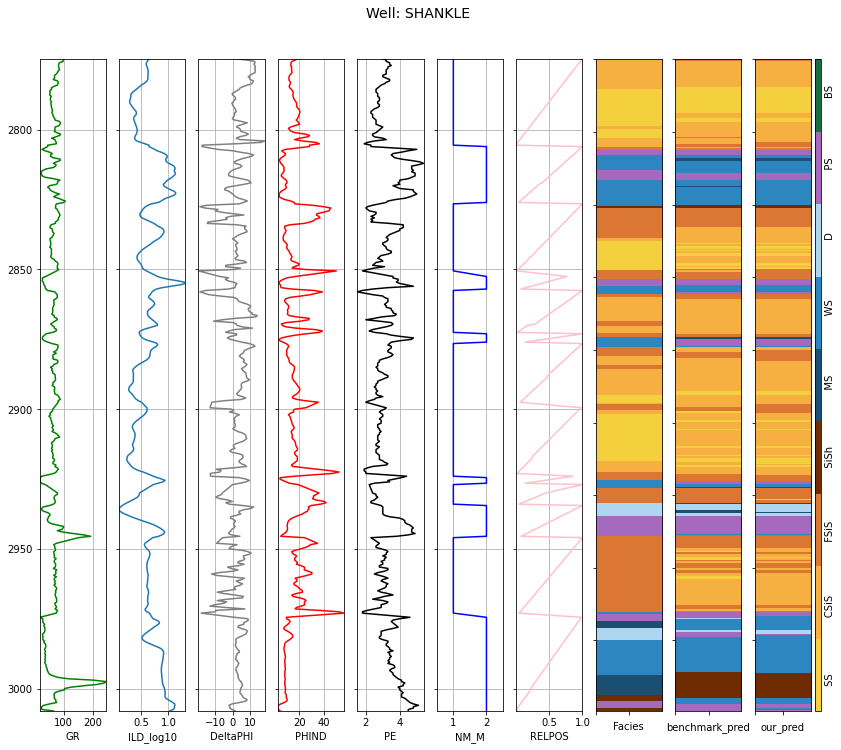

In [ ]:

data_test['benchmark_pred'] = y_pred1
data_test['our_pred'] = y_pred2
fig=compare_facies_plot3(data_test.sort_values(by='Depth'), 'benchmark_pred', 'our_pred', facies_colors)
